In [80]:
#Social_Network_Ads.csv

**Importing the libraries**

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [77]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [78]:
del data['User ID']


In [79]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [81]:
data =data.drop_duplicates()

In [82]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [83]:
#encodeing the data column Gender
data['Gender'] = data['Gender'].map({'Male' : 0,'Female' : 1})

<ipython-input-83-e5bdfa173bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'Male' : 0,'Female' : 1})


In [84]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [85]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
upper_threshold = data.Age.quantile(0.75) + (IQR*1.5)
lower_threshold = data.Age.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(3.5, 71.5)

In [86]:
IQR = data.EstimatedSalary.quantile(0.75) - data.EstimatedSalary.quantile(0.25)
upper_threshold = data.EstimatedSalary.quantile(0.75) + (IQR*1.5)
lower_threshold = data.EstimatedSalary.quantile(0.25) - (IQR*1.5)
lower_threshold,upper_threshold

(-24500.0, 155500.0)

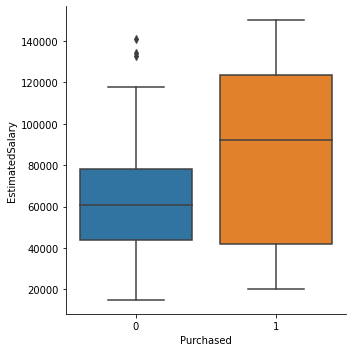

In [87]:
sns.catplot(data=data, x="Purchased", y="EstimatedSalary", kind="box")

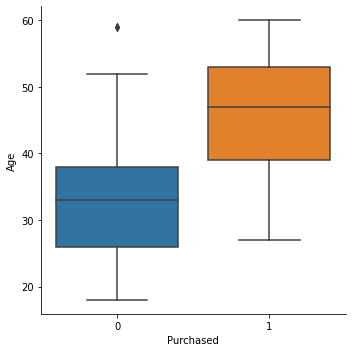

In [88]:
sns.catplot(data=data, x="Purchased", y="Age", kind="box")

**Splitting the dataset into the Training set and Test set**

In [89]:
from sklearn.model_selection import train_test_split

X = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values

x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 )

**Feature Scaling**

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [91]:

from sklearn.ensemble import RandomForestClassifier
rc  = RandomForestClassifier(max_depth=3,n_estimators=1000)

rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000)

In [92]:
y_pred = rc.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

**Predicting the Test set results**

In [93]:
from sklearn.metrics import  roc_auc_score

print('print Auroc score :',roc_auc_score(y_pred, y_test) )


print Auroc score : 0.9030769230769231


**Making the Confusion Matrix**

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[48,  2],
       [ 4, 22]])

**Visualising the Training set results**

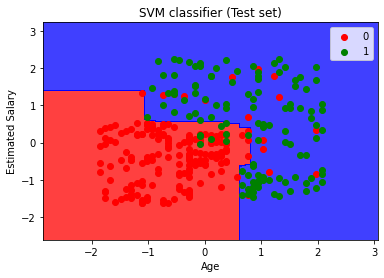

In [96]:
from matplotlib.colors import ListedColormap  

x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, rc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

**Visualising the Test set results**

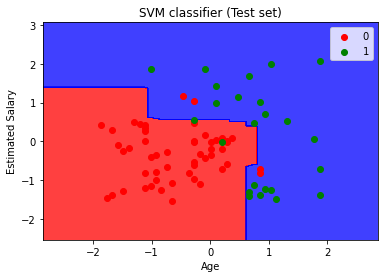

In [97]:
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, rc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  